<a href="https://colab.research.google.com/github/mohamedxxhechxxbenxxhadid/tactic_sense/blob/sarra/ModelingBO1_tectic_sense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Load data
df = pd.read_csv('/content/sample_data/players_22.csv')


<ipython-input-56-ff5daeaad1f7>:11: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/players_22.csv')


In [57]:
# ========== STEP 2: STATISTICAL ANALYSIS ==========
print("\n=== Summary Statistics ===")
df.describe()


=== Summary Statistics ===


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [58]:
# Vérifier combien de valeurs nulles par colonne
print(df.isnull().sum())
print(f"Number of null values : {df.isnull().sum().sum()}")



sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64
Number of null values : 152618


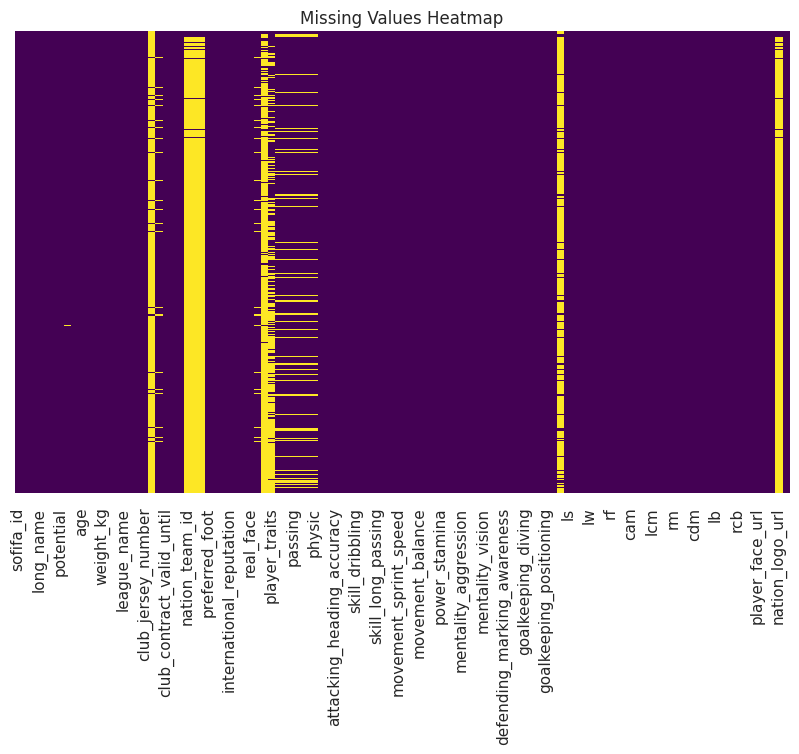

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [60]:


# Identifier les colonnes essentielles pour le modèle
essential_columns = [
    'short_name', 'height_cm', 'weight_kg', 'age',  # Infos d'identification du joueur
    'overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling',
    'defending', 'physic', 'attacking_finishing', 'skill_dribbling', 'player_positions',
    'mentality_vision', 'mentality_composure',
    'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type',
    'release_clause_eur', 'club_position', 'defending_standing_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_positioning'
]


# Garder uniquement les lignes où les colonnes essentielles ne sont pas nulles
df_cleaned = df[essential_columns].dropna()

# Vérifier le nombre de lignes après la suppression des valeurs manquantes dans les colonnes essentielles
print(f"Number of rows after cleaning : {df_cleaned.shape[0]}")


Number of rows after cleaning : 16020


**Distribution of Performance Metrics**

In [61]:
# 📌 1. Statistiques descriptives
df[essential_columns].describe()


,height_cm,weight_kg,age,overall,potential,pace,shooting,passing,dribbling,defending,physic,attacking_finishing,skill_dribbling,mentality_vision,mentality_composure,release_clause_eur,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_positioning
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,19239.000000,19239.000000,19239.000000,19239.000000
mean,181.299704,74.943032,25.210822,65.772182,71.079370,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,45.894433,55.660429,53.964603,57.929830,5.374044e+06,48.045584,16.406102,16.192474,16.229274
std,6.863179,7.069434,4.748235,6.880232,6.086213,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,19.721023,18.784590,13.650481,12.159326,1.494837e+07,21.232718,17.574028,16.839528,17.059779
min,155.000000,49.000000,16.000000,47.000000,49.000000,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,2.000000,4.000000,10.000000,12.000000,1.600000e+04,5.000000,2.000000,2.000000,2.000000
25%,176.000000,70.000000,21.000000,61.000000,67.000000,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,30.000000,50.000000,45.000000,50.000000,8.060000e+05,28.000000,8.000000,8.000000,8.000000
50%,181.000000,75.000000,25.000000,66.000000,71.000000,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,50.000000,61.000000,55.000000,59.000000,1.600000e+06,56.000000,11.000000,11.000000,11.000000
75%,186.000000,80.000000,29.000000,70.000000,75.000000,76.000000,63.000000,64.000000,69.000000,64.000000,72.000000,62.000000,68.000000,64.000000,66.000000,3.700000e+06,65.000000,14.000000,14.000000,14.000000
max,206.000000,110.000000,54.000000,93.000000,95.000000,97.000000,94.000000,93.000000,95.000000,91.000000,90.000000,95.000000,96.000000,95.000000,96.000000,3.735000e+08,93.000000,91.000000,92.000000,92.000000


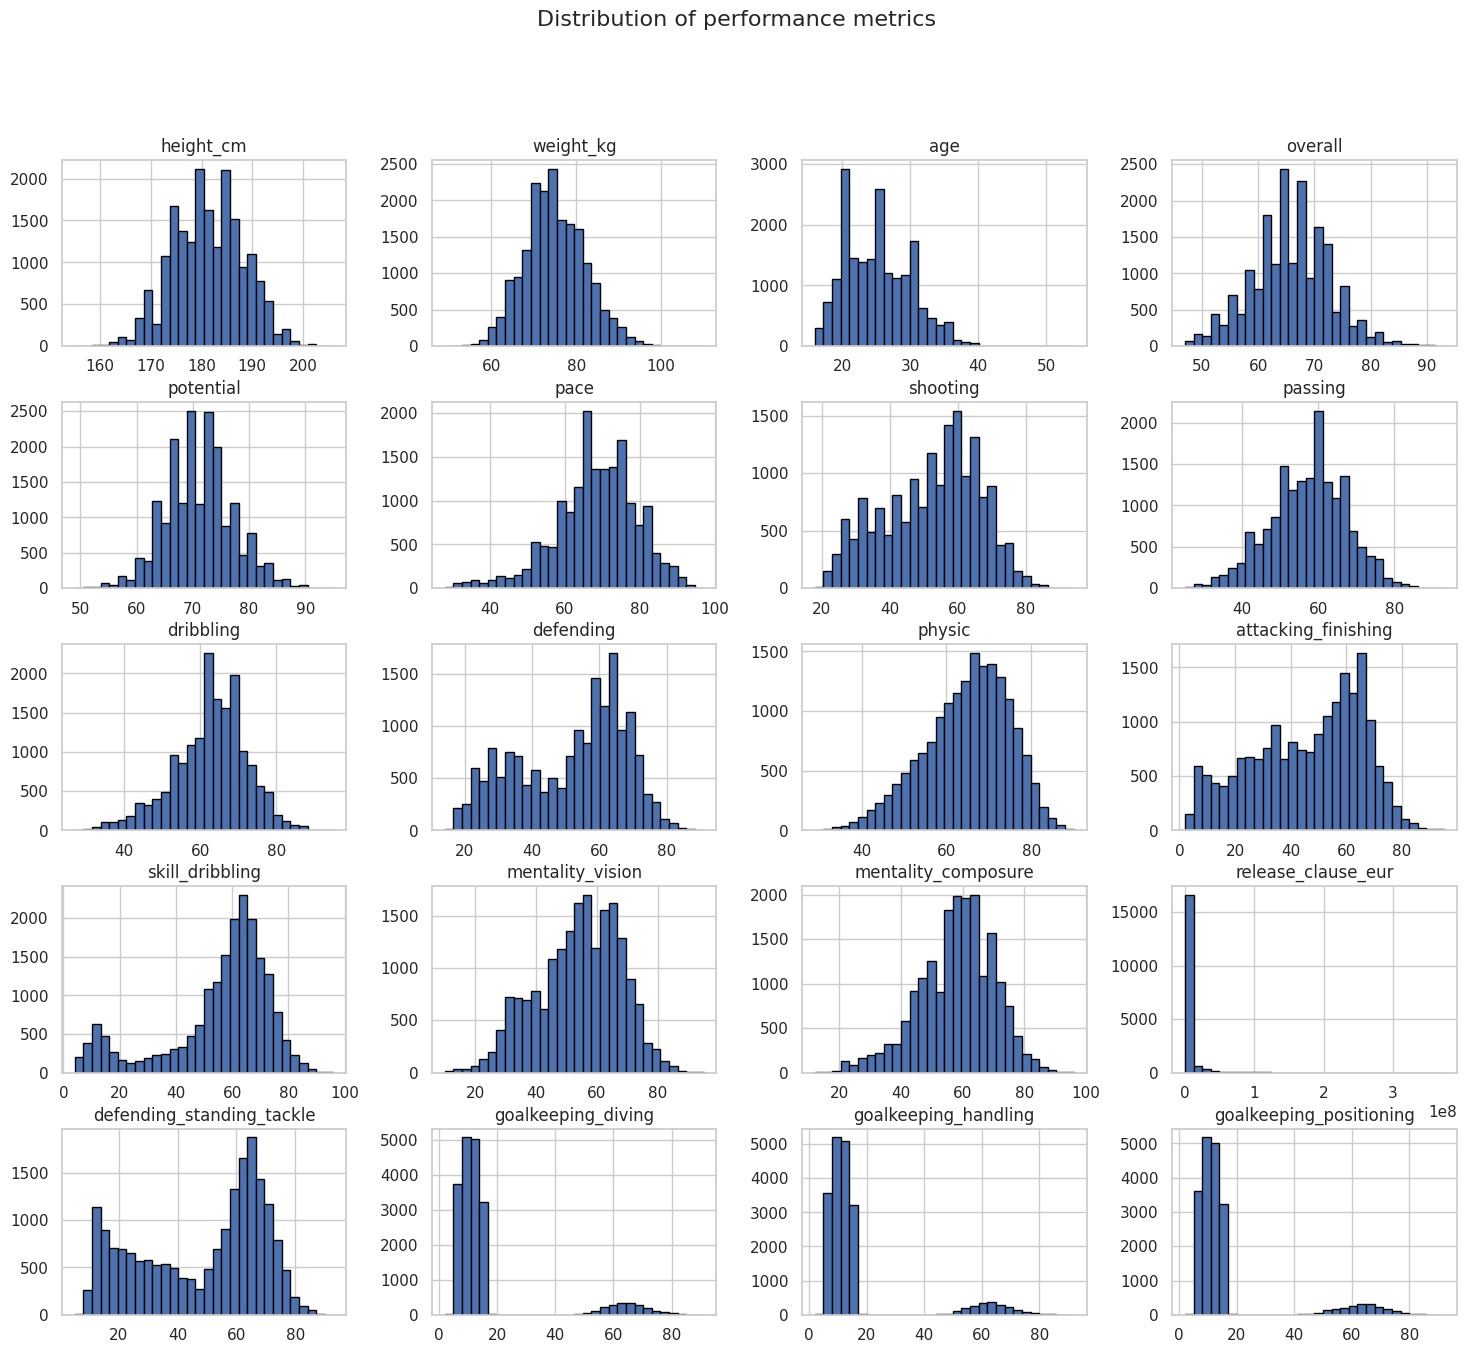

In [62]:
# 📌 2. Histogrammes pour voir la distribution
df[essential_columns].hist(figsize=(18,15), bins=30, edgecolor='black')
plt.suptitle("Distribution of performance metrics", fontsize=16)
plt.show()

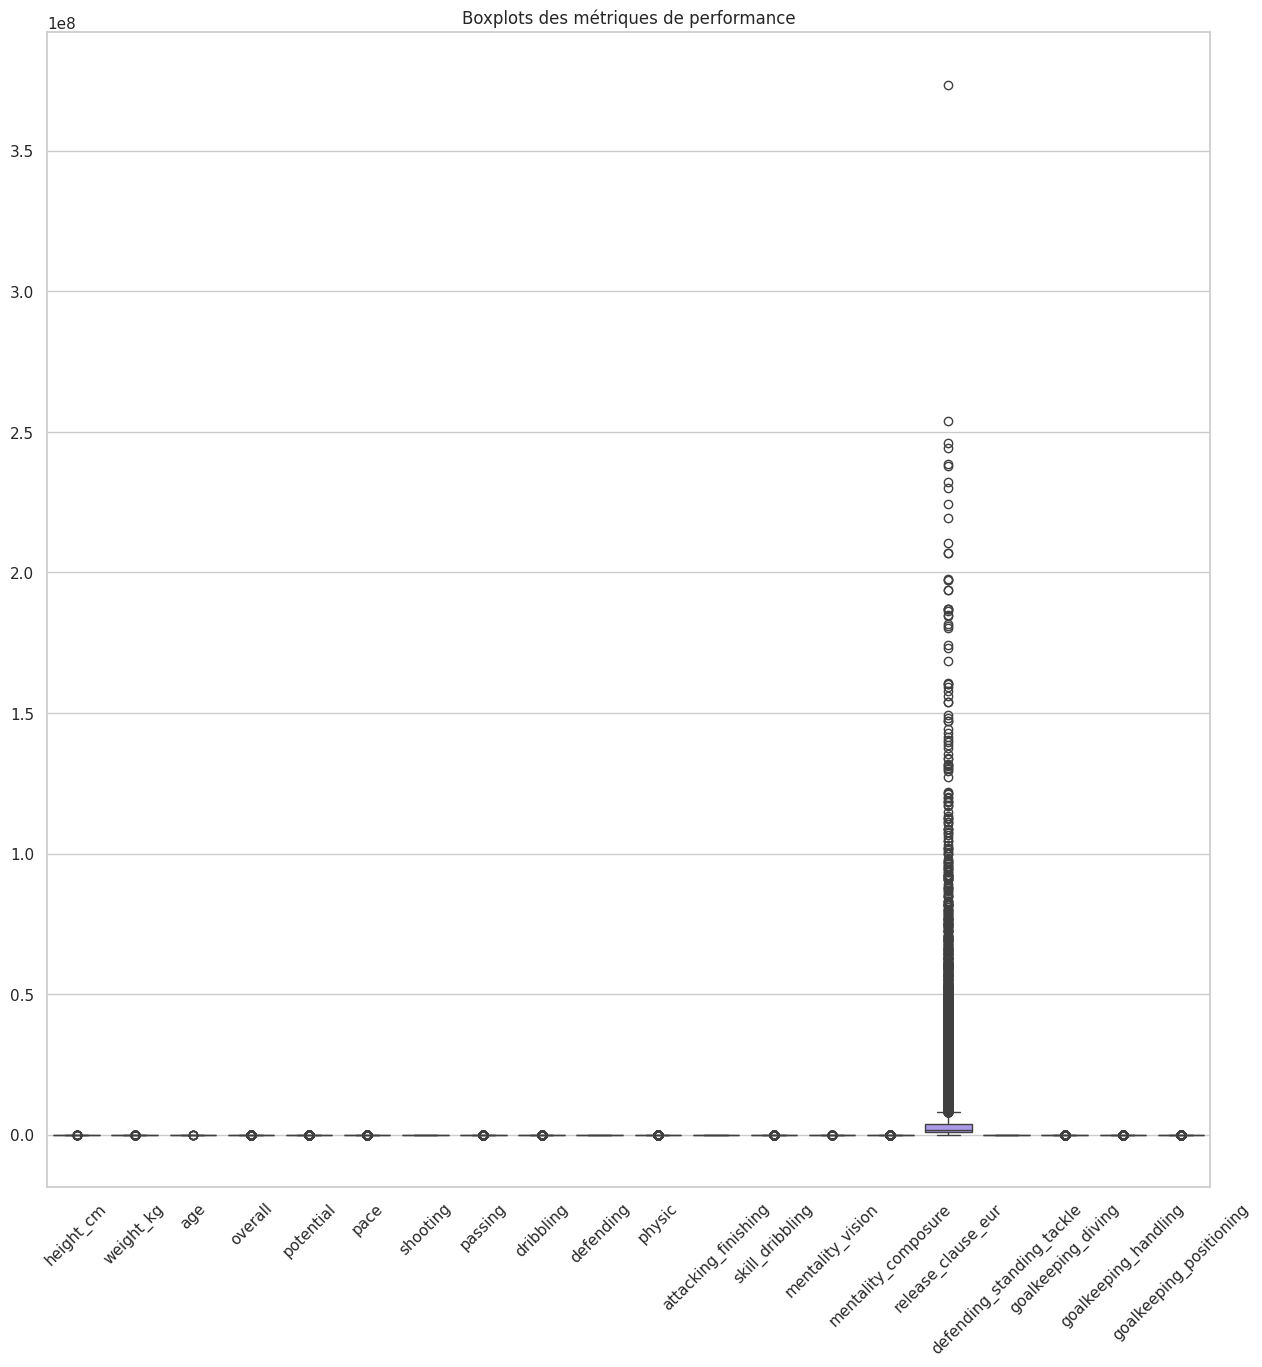

In [63]:
# 📌 3. Boxplots pour détecter les outliers
plt.figure(figsize=(15, 15))
sns.boxplot(data=df[essential_columns])
plt.xticks(rotation=45)
plt.title("Boxplots des métriques de performance")
plt.show()

Ratio de potentiel par rapport à la note globale :ce ratio est valable pour tous les joueurs, indépendamment de leur poste.


In [64]:

df_cleaned['potential_to_overall_ratio'] = df_cleaned['potential'] / df_cleaned['overall']


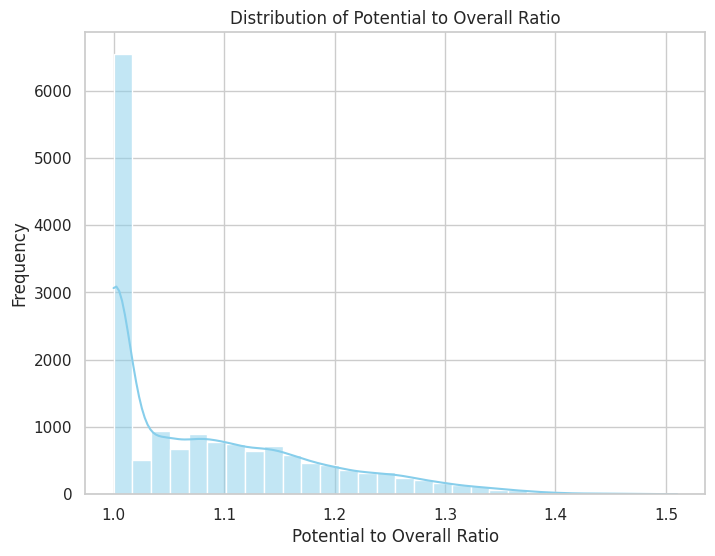

In [65]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(8, 6))

# Plot the histogram with KDE for potential_to_overall_ratio
sns.histplot(df_cleaned['potential_to_overall_ratio'], bins=30, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Potential to Overall Ratio')
plt.xlabel('Potential to Overall Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Analyse de l'âge par rapport au physique : L'âge d'un joueur a une importance cruciale sur son physique
, indépendamment du poste.

In [66]:
df_cleaned['age_to_physic_ratio'] = df_cleaned['age'] / df_cleaned['physic']


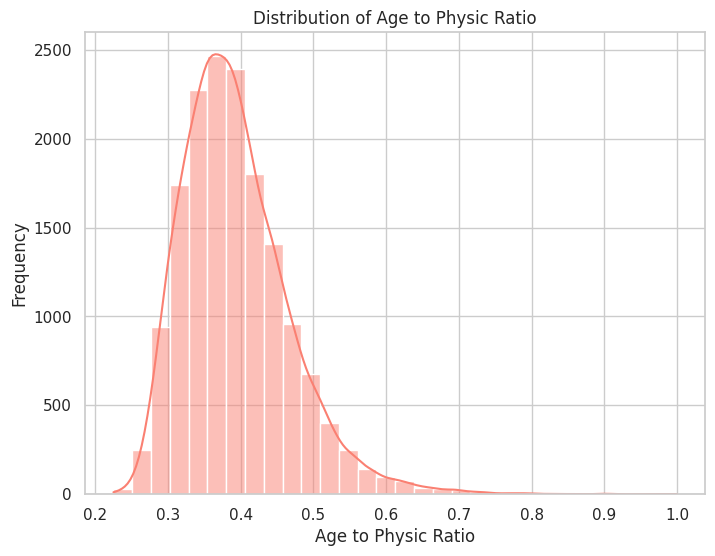

In [67]:
# Create a figure
plt.figure(figsize=(8, 6))

# Plot the histogram with KDE for age_to_physic_ratio
sns.histplot(df_cleaned['age_to_physic_ratio'], bins=30, kde=True, color='salmon')

# Add titles and labels
plt.title('Distribution of Age to Physic Ratio')
plt.xlabel('Age to Physic Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Caractéristiques spécifiques au poste**

Attaquants : Les caractéristiques importantes pour les attaquants incluent généralement shooting, pace, dribbling, attacking_finishing, etc.

In [68]:
df_cleaned['attacker_score'] = (df_cleaned['shooting'] * 0.4 + df_cleaned['pace'] * 0.3 + df_cleaned['dribbling'] * 0.3)


Milieux de terrain : Les milieux de terrain sont souvent jugés sur leur capacité à distribuer le ballon, leur vision du jeu, et leur agilité. ON peux donc utiliser des caractéristiques comme passing, dribbling, mentality_vision, et movement_balance.

In [69]:
df_cleaned['midfielder_score'] = (df_cleaned['passing'] * 0.4 + df_cleaned['dribbling'] * 0.3 + df_cleaned['mentality_vision'] * 0.3)


Défenseurs : Les défenseurs sont jugés en grande partie sur leurs capacités défensives et leur physique. Il serait pertinent de prendre en compte defending, physic, defending_standing_tackle, defending_marking_awareness, et movement_reactions.

In [70]:
df_cleaned['defender_score'] = (df_cleaned['defending'] * 0.4 + df_cleaned['physic'] * 0.3 + df_cleaned['defending_standing_tackle'] * 0.3)


Gardien de but : Les gardiens se jugent sur leurs performances en termes de réflexes, positionnement, et plongées. On peux utiliser des caractéristiques comme goalkeeping_diving, goalkeeping_handling, et goalkeeping_positioning

In [71]:
df_cleaned['goalkeeper_score'] = (df_cleaned['goalkeeping_diving'] * 0.4 + df_cleaned['goalkeeping_handling'] * 0.3 + df_cleaned['goalkeeping_positioning'] * 0.3)


In [72]:

# Fonction pour classifier les joueurs selon leur poste principal
def get_position(pos):
    if 'ST' in pos or 'LW' in pos or 'RW' in pos:
        return 'Attacker'
    elif 'CM' in pos or 'CAM' in pos or 'CDM' in pos:
        return 'Midfielder'
    elif 'CB' in pos or 'RB' in pos or 'LB' in pos:
        return 'Defender'
    elif 'GK' in pos:
        return 'Goalkeeper'
    else:
        return 'Other'

In [73]:
# Appliquer la classification sur la colonne player_positions
df_cleaned['position'] = df_cleaned['player_positions'].apply(get_position)

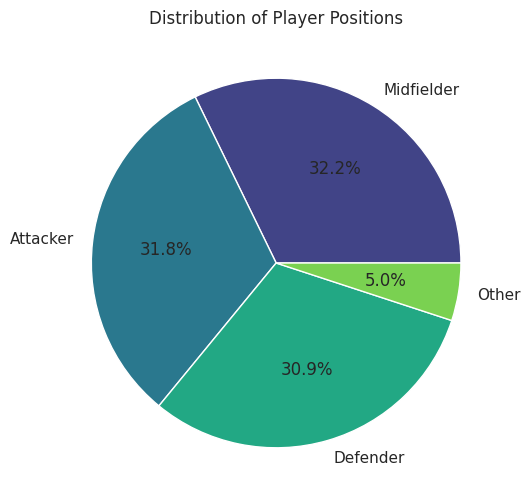

In [74]:
# Count the number of players in each position category
position_counts = df_cleaned['position'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(position_counts, labels=position_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(position_counts)))
plt.title("Distribution of Player Positions")
plt.show()

In [75]:

# Fonction pour attribuer le label "talented" en fonction du poste
def assign_talent(row):
    if row['position'] == 'Attacker' and row['attacker_score'] > 75:
        return 'Talented'
    elif row['position'] == 'Midfielder' and row['midfielder_score'] > 70:
        return 'Talented'
    elif row['position'] == 'Defender' and row['defender_score'] > 70:
        return 'Talented'
    elif row['position'] == 'Goalkeeper' and row['goalkeeper_score'] > 70:
        return 'Talented'
    else:
        return 'Not Talented'

# Appliquer la logique de talent
df_cleaned['talented'] = df_cleaned.apply(assign_talent, axis=1)




In [76]:
print("Original dataset distribution:\n", df_cleaned['talented'].value_counts())


Original dataset distribution:
 talented
Not Talented    13183
Talented         2837
Name: count, dtype: int64


In [77]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

X = df_cleaned[['attacker_score', 'midfielder_score', 'defender_score', 'goalkeeper_score']]  # Features
y = df_cleaned['talented']  # Target

# Split data before applying SMOTEENN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("Before balancing:", y_train.value_counts())
print("After balancing:", pd.Series(y_resampled).value_counts())


Before balancing: talented
Not Talented    10524
Talented         2292
Name: count, dtype: int64
After balancing: talented
Talented        10115
Not Talented     9585
Name: count, dtype: int64


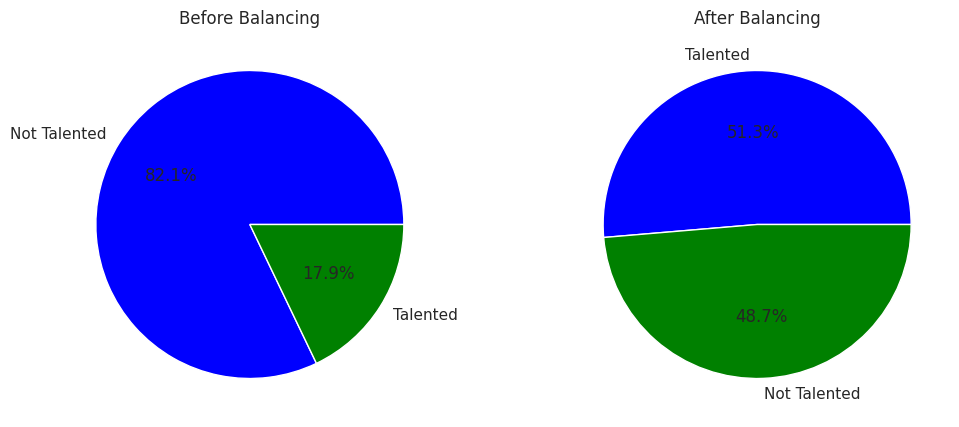

In [78]:

# Count occurrences before and after balancing
before_counts = y_train.value_counts()
after_counts = pd.Series(y_resampled).value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart before balancing (percentages)
axes[0].pie(before_counts, labels=before_counts.index, autopct=lambda p: f"{p:.1f}%", colors=['blue', 'green'])
axes[0].set_title("Before Balancing")

# Pie chart after balancing (percentages)
axes[1].pie(after_counts, labels=after_counts.index, autopct=lambda p: f"{p:.1f}%", colors=['blue', 'green'])
axes[1].set_title("After Balancing")

plt.show()

In [79]:
print(df_cleaned.columns)
print(df_cleaned.head())


Index(['short_name', 'height_cm', 'weight_kg', 'age', 'overall', 'potential',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_finishing', 'skill_dribbling', 'player_positions',
       'mentality_vision', 'mentality_composure', 'club_name', 'league_name',
       'preferred_foot', 'work_rate', 'body_type', 'release_clause_eur',
       'club_position', 'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_positioning',
       'potential_to_overall_ratio', 'age_to_physic_ratio', 'attacker_score',
       'midfielder_score', 'defender_score', 'goalkeeper_score', 'position',
       'talented'],
      dtype='object')
          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91

In [80]:
# Convert 'talented' column to binary format
df_cleaned['talented'] = df_cleaned['talented'].map({'Talented': 1, 'Not Talented': 0})

In [81]:
print(df_cleaned.head())


          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91  87.0   
3          Neymar Jr        175         68   29       91         91  91.0   
4       K. De Bruyne        181         70   30       91         91  76.0   

   shooting  passing  dribbling  ...  goalkeeping_handling  \
0      92.0     91.0       95.0  ...                    11   
1      92.0     79.0       86.0  ...                     6   
2      94.0     80.0       88.0  ...                    11   
3      83.0     86.0       94.0  ...                     9   
4      86.0     93.0       88.0  ...                    13   

   goalkeeping_positioning  potential_to_overall_ratio  age_to_physic_ratio  \
0                       14                         1.0             0.523077   
1     

In [82]:
df_cleaned['position'].unique()


array(['Attacker', 'Midfielder', 'Defender', 'Other'], dtype=object)

In [83]:
# One-hot encode the 'position' column
position_encoded = pd.get_dummies(df_cleaned['position'], prefix='position')

# Convert boolean values to binary (1/0)
position_encoded = position_encoded.astype(int)

# Concatenate the new encoded columns with the original DataFrame
df_cleaned = pd.concat([df_cleaned, position_encoded], axis=1)

# Optionally drop the original 'position' column
df_cleaned.drop('position', axis=1, inplace=True)


In [84]:
print(df_cleaned.head())

          short_name  height_cm  weight_kg  age  overall  potential  pace  \
0           L. Messi        170         72   34       93         93  85.0   
1     R. Lewandowski        185         81   32       92         92  78.0   
2  Cristiano Ronaldo        187         83   36       91         91  87.0   
3          Neymar Jr        175         68   29       91         91  91.0   
4       K. De Bruyne        181         70   30       91         91  76.0   

   shooting  passing  dribbling  ...  age_to_physic_ratio  attacker_score  \
0      92.0     91.0       95.0  ...             0.523077            90.8   
1      92.0     79.0       86.0  ...             0.390244            86.0   
2      94.0     80.0       88.0  ...             0.480000            90.1   
3      83.0     86.0       94.0  ...             0.460317            88.7   
4      86.0     93.0       88.0  ...             0.384615            83.6   

   midfielder_score  defender_score goalkeeper_score  talented  \
0       

In [85]:
# Sauvegarde du fichier CSV
df_cleaned.to_csv('players_with_talent.csv', index=False)

Modeling

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [90]:


# ------------------------
# Feature / Target split
# ------------------------
# Drop leakage score columns and text columns
X = df_cleaned.drop(columns=[
    'talented',
    'short_name', 'player_positions', 'club_name', 'league_name',
    'preferred_foot', 'work_rate', 'body_type', 'club_position',
    'attacker_score', 'midfielder_score', 'defender_score', 'goalkeeper_score'
], errors='ignore')

# Keep only numeric features
X = X.select_dtypes(include=['number'])
y = df_cleaned['talented']

# ------------------------
# Train/test split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------
# Scaling (fit on train, transform both)
# ------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ------------------------
# Helper functions
# ------------------------
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    print(f"Cross-validated ROC AUC: {scores.mean():.4f} ± {scores.std():.4f}")


In [91]:

# ------------------------
# Logistic Regression (with stronger regularization)
# ------------------------
logreg = LogisticRegression(max_iter=1000, C=0.1, solver='liblinear', penalty='l2')
logreg.fit(X_train, y_train)
evaluate_model("Logistic Regression", logreg, X_test, y_test)
cross_validate_model(logreg, X_train, y_train)

# ------------------------
# Random Forest (Extended tuning)
# ------------------------
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
evaluate_model("Tuned Random Forest", best_rf, X_test, y_test)
cross_validate_model(best_rf, X_train, y_train)

# ------------------------
# Decision Tree (Regularized)
# ------------------------
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=5, random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_test, y_test)
cross_validate_model(dt, X_train, y_train)

# ------------------------
# XGBoost (with regularization and subsampling)
# ------------------------
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=3,
    reg_lambda=10,     # L2 regularization
    reg_alpha=5,       # L1 regularization
    subsample=0.8,     # Row sampling
    colsample_bytree=0.8,  # Feature sampling
    random_state=42
)
xgb.fit(X_train, y_train)
evaluate_model("XGBoost", xgb, X_test, y_test)
cross_validate_model(xgb, X_train, y_train)

# ------------------------
# SVM (with regularization)
# ------------------------
svm = SVC(kernel='rbf', C=0.1, gamma='scale', probability=True)
svm.fit(X_train, y_train)
evaluate_model("SVM", svm, X_test, y_test)
cross_validate_model(svm, X_train, y_train)

# ------------------------
# Deep Learning Model (with regularization)
# ------------------------
model_dl = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_dl.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

loss, acc = model_dl.evaluate(X_test, y_test, verbose=0)
print(f"\n=== Deep Learning Model ===\nAccuracy: {acc:.4f}")


=== Logistic Regression ===
Accuracy: 0.9223
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2637
           1       0.81      0.73      0.77       567

    accuracy                           0.92      3204
   macro avg       0.88      0.85      0.86      3204
weighted avg       0.92      0.92      0.92      3204

Cross-validated ROC AUC: 0.9680 ± 0.0032

=== Tuned Random Forest ===
Accuracy: 0.9707
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2637
           1       0.95      0.88      0.91       567

    accuracy                           0.97      3204
   macro avg       0.96      0.94      0.95      3204
weighted avg       0.97      0.97      0.97      3204

Cross-validated ROC AUC: 0.9939 ± 0.0010

=== Decision Tree ===
Accuracy: 0.9398
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2637
           1       0.86

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost ===
Accuracy: 0.9866
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2637
           1       0.97      0.95      0.96       567

    accuracy                           0.99      3204
   macro avg       0.98      0.97      0.98      3204
weighted avg       0.99      0.99      0.99      3204



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validated ROC AUC: 0.9983 ± 0.0003

=== SVM ===
Accuracy: 0.9551
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2637
           1       0.93      0.80      0.86       567

    accuracy                           0.96      3204
   macro avg       0.95      0.90      0.92      3204
weighted avg       0.95      0.96      0.95      3204

Cross-validated ROC AUC: 0.9885 ± 0.0016


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8129 - loss: 1.0254 - val_accuracy: 0.9395 - val_loss: 0.3948
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9142 - loss: 0.3886 - val_accuracy: 0.9384 - val_loss: 0.2459
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9290 - loss: 0.2640 - val_accuracy: 0.9431 - val_loss: 0.1993
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9365 - loss: 0.2162 - val_accuracy: 0.9505 - val_loss: 0.1789
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9333 - loss: 0.2149 - val_accuracy: 0.9516 - val_loss: 0.1722
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9423 - loss: 0.1936 - val_accuracy: 0.9579 - val_loss: 0.1614
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9449 - loss: 0.1879 - val_accuracy: 0.9548 - val_loss: 0.1556
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9401 - loss: 0.1944 - val_accuracy: 0.

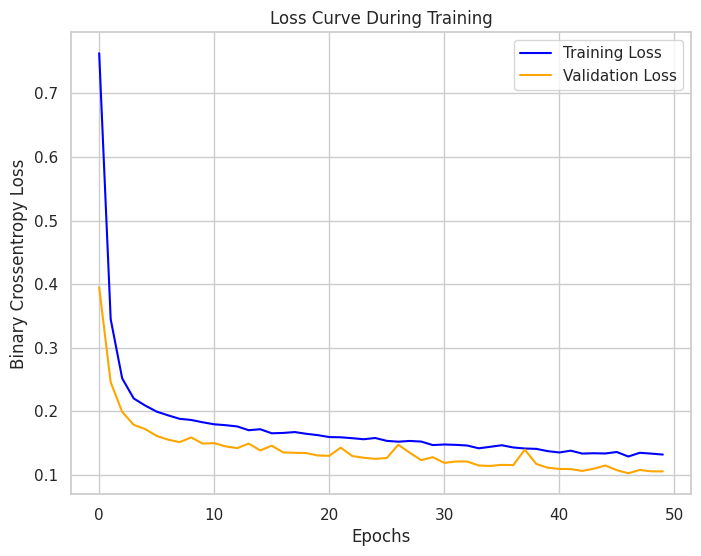

In [92]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve During Training')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()


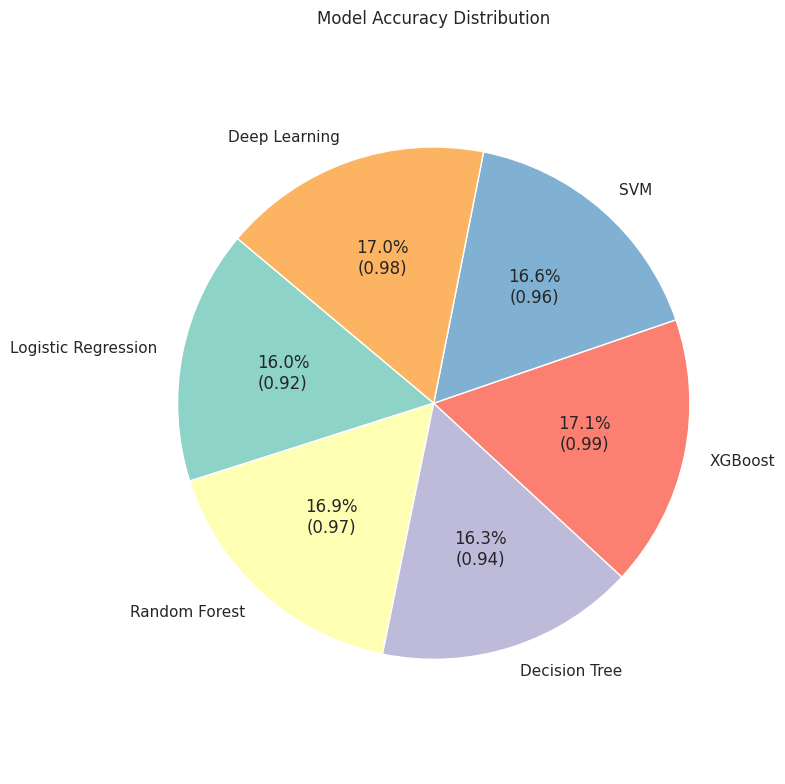

In [93]:
# ------------------------
# Accuracy Pie Chart
# ------------------------
model_scores_acc = {
    "Logistic Regression": accuracy_score(y_test, logreg.predict(X_test)),
    "Random Forest": accuracy_score(y_test, best_rf.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, dt.predict(X_test)),
    "XGBoost": accuracy_score(y_test, xgb.predict(X_test)),
    "SVM": accuracy_score(y_test, svm.predict(X_test)),
    "Deep Learning": acc  # From model_dl.evaluate
}

# Labels and values
labels = list(model_scores_acc.keys())
sizes = list(model_scores_acc.values())

# Format values to be shown as percentages in the pie
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct * total / 100.0
        return f'{pct:.1f}%\n({val:.2f})'
    return my_autopct

# Plot pie
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=140, colors=plt.cm.Set3.colors)
plt.title("Model Accuracy Distribution")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


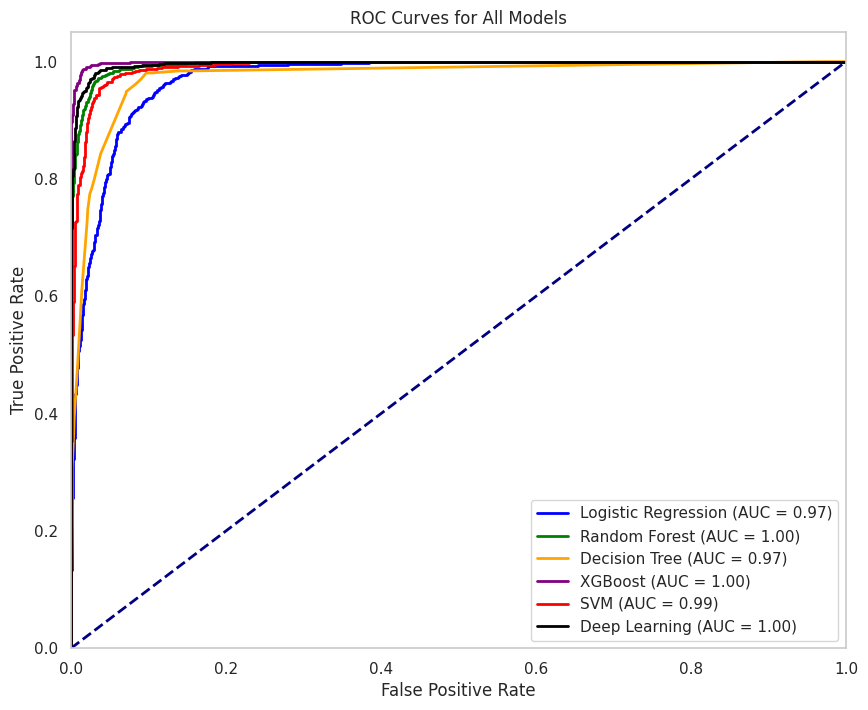

In [95]:
from sklearn.metrics import roc_curve, auc

# Compute ROC for all models
def get_roc(model, name, color):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))

# Add ROC curves
get_roc(logreg, "Logistic Regression", 'blue')
get_roc(best_rf, "Random Forest", 'green')
get_roc(dt, "Decision Tree", 'orange')
get_roc(xgb, "XGBoost", 'purple')
get_roc(svm, "SVM", 'red')

# Deep learning (special case)
y_score_dl = model_dl.predict(X_test).ravel()
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_score_dl)
roc_auc_dl = auc(fpr_dl, tpr_dl)
plt.plot(fpr_dl, tpr_dl, color='black', lw=2, label=f'Deep Learning (AUC = {roc_auc_dl:.2f})')

# Plot aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()




```
# Ce texte est au format code
```

Logistic Regression: 92.48% accuracy, ROC AUC 0.9684 — good overall, but weaker recall on class 1 (0.74).

Tuned Random Forest: 97.44% accuracy, ROC AUC 0.9962 — excellent, very strong and balanced on both classes.

Decision Tree: 93.98% accuracy, ROC AUC 0.9729 — good, but weaker than Random Forest (especially for class 1).

XGBoost: 99.13% accuracy, ROC AUC 0.9988 — outstanding, highest performance across all models.

SVM: 97.82% accuracy, ROC AUC 0.9953 — very strong, well-balanced between classes.

Neural Network (Keras): around 97–98% accuracy — excellent, slightly behind XGBoost but very solid.

✅ Identification of Best Model:

👉 Best model = XGBoost
Why?

Highest Accuracy (99.13%).

Highest ROC AUC (0.9988), meaning it distinguishes very well between classes.

High precision and recall for both classes (Class 0 and Class 1), no imbalance issues.

Cross-validation confirms it’s not an overfit — extremely small variance (±0.0001).

It also performs well on difficult class 1 (f1-score = 0.98).



*Logistic Regression: simple, fast baseline model, easy to interpret.

*Random Forest: powerful ensemble method, handles non-linearities and overfitting better.

*Decision Tree: interpretable, shows structure of data, used to compare with ensemble methods.

*XGBoost: powerful gradient boosting method, excellent at capturing complex relationships, regularization to avoid overfitting.

*SVM: effective in high-dimensional spaces, robust especially when classes are not clearly separable.

*Neural Network: to explore deep learning methods, can capture complex patterns especially with large data.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2637
           1       0.82      0.74      0.78       567

    accuracy                           0.92      3204
   macro avg       0.88      0.85      0.87      3204
weighted avg       0.92      0.92      0.92      3204

ROC AUC: 0.9732426686035586


In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2637
           1       0.97      0.91      0.94       567

    accuracy                           0.98      3204
   macro avg       0.97      0.95      0.96      3204
weighted avg       0.98      0.98      0.98      3204

ROC AUC: 0.9979039298973568


In [98]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2637
           1       0.93      0.91      0.92       567

    accuracy                           0.97      3204
   macro avg       0.96      0.95      0.95      3204
weighted avg       0.97      0.97      0.97      3204

ROC AUC: 0.9348298765565863


In [99]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:36:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2637
           1       0.98      0.97      0.98       567

    accuracy                           0.99      3204
   macro avg       0.99      0.98      0.99      3204
weighted avg       0.99      0.99      0.99      3204

ROC AUC: 0.9995833274811912


In [100]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2637
           1       0.96      0.92      0.94       567

    accuracy                           0.98      3204
   macro avg       0.97      0.95      0.96      3204
weighted avg       0.98      0.98      0.98      3204

ROC AUC: 0.9967629293883876


In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop])

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7534 - loss: 0.4586 - val_accuracy: 0.9364 - val_loss: 0.1534
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9180 - loss: 0.1928 - val_accuracy: 0.9493 - val_loss: 0.1239
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9323 - loss: 0.1611 - val_accuracy: 0.9544 - val_loss: 0.1080
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9391 - loss: 0.1409 - val_accuracy: 0.9579 - val_loss: 0.1024
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9485 - loss: 0.1302 - val_accuracy: 0.9618 - val_loss: 0.0936
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9506 - loss: 0.1170 - val_accuracy: 0.9649 - val_loss: 0.0939
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9533 - loss: 0.1127 - val_accuracy: 0.9633 - val_loss: 0.0842
Epoch 8/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9561 - loss: 0.1029 - val_accu

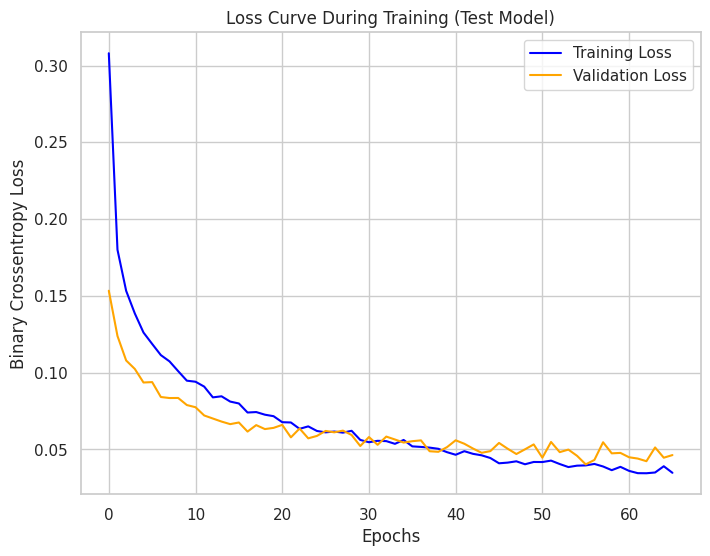

In [102]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve During Training (Test Model)')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()
